# Titanic Survival Exploration

In [26]:
# Import libraries necessary for this project

import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset

in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis=1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function


predictions = pd.Series(np.ones(5, dtype=int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


## Question 1
### Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?
### Hint: Run the code cell below to see the accuracy of this prediction.

In [29]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions


predictions = predictions_0(data)

In [30]:
print ("Answer: " +accuracy_score(outcomes, predictions))

Answer: Predictions have an accuracy of 61.62%.


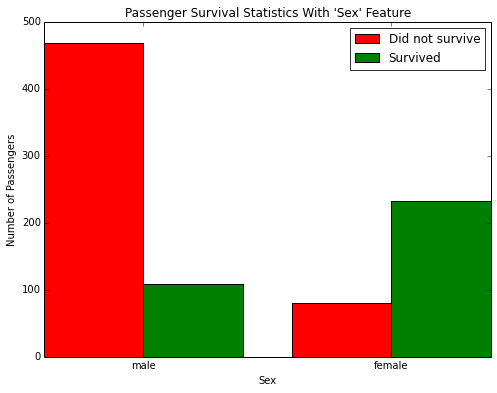

In [31]:
vs.survival_stats(data, outcomes, 'Sex')

## Question 2
### How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

In [32]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions


predictions = predictions_1(data)

In [33]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


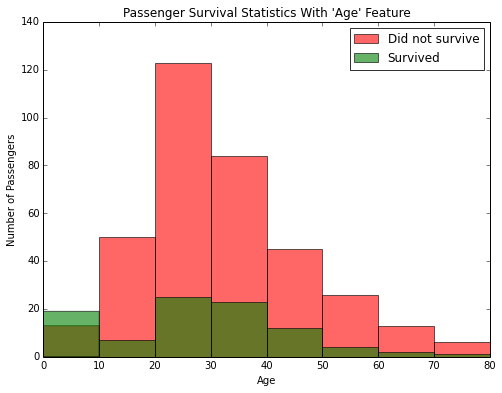

In [34]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [35]:

def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []    
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions


predictions = predictions_2(data)

## Question 3
### How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?

In [36]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


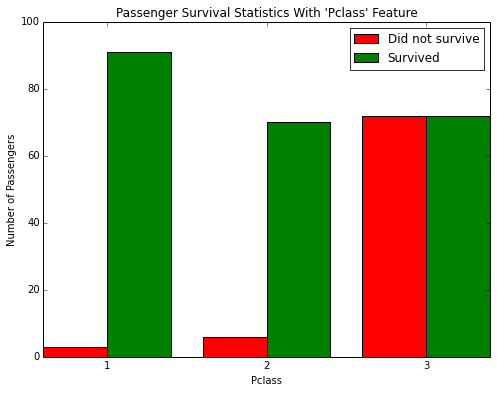

In [37]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'"])

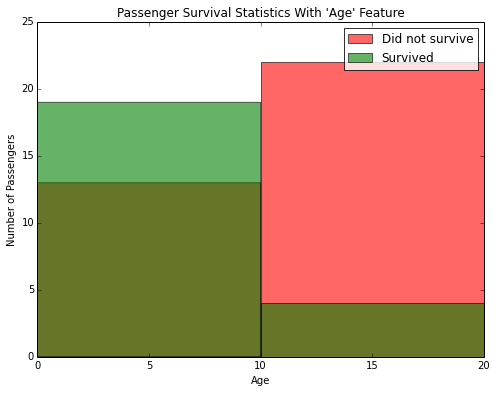

In [38]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

In [39]:
def predictions_3(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 14. 
            - Predict a passenger survived if they are female and their Pclass is less than 2."""
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Age'] < 14:
            predictions.append(1)
        elif passenger['Pclass'] < 2 and passenger['Sex'] == 'female':
           predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions


predictions = predictions_3(data)

In [40]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.24%.


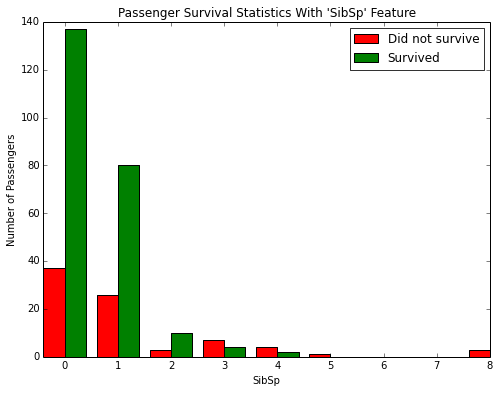

In [41]:
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'"])

In [42]:
def predictions_4(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female and if their SibSp is less than 2.
            - Predict a passenger survived if they are male and younger than 14."""
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            if passenger['SibSp'] > 2:
                predictions.append(0)
            else:
                predictions.append(1)
        elif passenger['Age'] < 14:
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions


predictions = predictions_4(data)

In [43]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.25%.


In [44]:
def predictions_5(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female and if their SibSp is less than 2.
            - Predict a passenger survived if they are male and younger than 10."""
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            if passenger['SibSp'] > 2:
                predictions.append(0)
            else:
                predictions.append(1)
        elif passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions


predictions = predictions_5(data)

## Question 4
### Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?

In [45]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.36%.


## Question 5:

### Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.

### Answer:

### 1. Predicting Diabetes using Supervised Learning. Outcome variable is whether a patient has diabetes or not. Features include, age, gender, pre-conditions, procedures, medications.
### 2. Calculating Employee Attrition using sentiment analysis. Outcome variable is the sentiment which is positive feeback or negative feedback. Features include Salary, Benefits, Workload, Worklife balance, Management etc.

